# Connect Database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [ ]:
# Author - Kaveesha Baddage

# Install spaCy and neuralcoref with correct versions 

# !pip install -U spacy==2.1.0 

!python -m spacy download en

# !pip uninstall -y neuralcoref 

# !pip install neuralcoref --no-binary neuralcoref

!pip install pattern
!pip -q install pythainlp

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-20 16:45:06.067962: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 16:45:08.296233: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 16:45:08.296396: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [ ]:
# Import necessary libraries
import keras
import numpy as np
import pandas as pd
import nltk
import os
import nltk.corpus
# import spacy
# import neuralcoref

In [ ]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Text Preprocessing

## Load Data

In [ ]:
# !wget https://www.dropbox.com/s/fsxepdka4l2pr45/prachathai-67k.zip; unzip prachathai-67k.zip

In [ ]:
# prachathai = pd.read_csv('prachathai-67k.csv')
# print(prachathai.shape)
# prachathai.tail()

In [ ]:
# benchmark_labels = ['การเมือง','สิ่งแวดล้อม','เศรษฐกิจ','วัฒนธรรม','การศึกษา']

In [ ]:
# all_df = prachathai[['body_text', 'labels']].copy()
# all_df.head()

# #use only benchmark labels
# for lab in benchmark_labels:
#     all_df[lab] = all_df.labels.map(lambda x: 1 if lab in x else 0)
# all_df.drop('labels',axis=1,inplace=True)

In [ ]:
# df = prachathai[['title','body_text', 'labels']]
# df['content'] = df['title'] + ' ' + df['body_text']
# df.drop(['title','body_text'],axis=1,inplace=True)

In [ ]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_crime_th.txt', sep='|', )
sanook

,title,content
0,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...,หนุ่มยกพวกขึ้น สน. ทางด่วน 1 ถามสาเหตุตั้งกรวย...
1,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...,ยายเด็ก ป.5 เข้าแจ้งความเอาผิดแล้ว ขณะที่มียาย...
2,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...,เด็กหญิง 8 ขวบร้องถูกเพื่อนบ้านข่มขืน เมียลั่น...
3,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ เพื่อนบ้า...
4,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...,วงจรปิดจับภาพนาทีรถแท็กซี่ตีนผีเมาซิ่งชนยาย วั...
...,...,...
992,เฒ่าหื่นทำอนาจาร ด.ญ.4 ขวบจนเลือดซึม ยังปฏิเสธ...,ตำรวจ สภ.นาโพธิ์ จ.บุรีรัมย์ ได้ควบคุมตัวเฒ่าเ...
993,รปภ.ตามจีบสาว รปภ.ด้วยกัน ฝ่ายหญิงไม่เล่นด้วย ...,เมื่อเวลา 09.00 น. วันที่ 21 กันยายน พ.ต.ต.สถิ...
994,6 ล้อเบรกแตก! พุ่งชนจยย. ดับ 2 ศพ ชาวบ้านรุมตื...,รถบรรทุก 6 ล้อ ขนคนงานเบรกแตกชนจยย. กลางแยกพร้...
995,นายหน้าจ้างเด็กหญิงวัย 13 ไปทำงานแม่บ้าน ที่แท...,นายหน้าจ้างเด็กหญิงวัย 13 ไปทำงานแม่บ้าน ที่แท...


In [ ]:
thairath = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_crime_thairath_th.txt', sep='|' )
thairath

,title,content
0,"ให้ออก ""ดาบตำรวจชิงทอง"" สั่งเด้ง ผกก.สภ.เอราวั...","ผบก.ภ.จว.เลย เซ็นคำสั่งให้ ""ดาบตำรวจสมภพ"" ผบ.ห..."
1,พล.ต.อ.วิระชัย ทรงเมตตา โกนหัวบวชแล้ววัดโพธิ์ ...,"เข้าสู่ร่มกาสาวพัสตร์ ""พล.ต.อ.วิระชัย ทรงเมตตา..."
2,ดาบตำรวจชิงทอง สารภาพเครียดหนี้ท่วม มีปากเสียง...,บิ๊กโจ๊ก พล.ต.อ.สุรเชษฐ์ หักพาล รอง ผบ.ตร. แถล...
3,กู้ภัยงมเจอหลักฐานสำคัญ ขวาน-มีดของกลาง หนุ่มโ...,กู้ภัยงมเจอขวาน-มีดของกลาง หนุ่มโหดใช้หั่นศพเซ...
4,ปคม.บุกจับผับเถื่อนมหาสารคาม ไม่มีใบอนุญาต ปล่...,"ตำรวจ ปคม. ลุยจับสถานบันเทิง ""เมโลดี้"" ปล่อยเด..."
...,...,...
1995,ร้อง ผบ.ตร.ถูกแก๊งคอลเซ็นเตอร์ หลอก 90 ล้าน ตั...,ตัวแทนผู้เสียหายร้อง ผบ.ตร.ถูกแก๊งคอลเซ็นเตอร์...
1996,ไม่มีเซอร์ไพรส์ อัยการดาวชี้คดีแตงโม ไร้หลักฐา...,อัยการดาว ชี้คดีแตงโม ไม่ได้มีหลักฐานใหม่ใดๆ ต...
1997,"191 ติดยศ ""สุนัขตำรวจตรี"" ให้ ""ไอร่า-โคล่าร์"" ...",ผู้การ 191 ติดยศให้รางวัลสุนัขตำรวจ ประจำปี 25...
1998,รวบ 3 หนุ่มซ่าเร่ขายกัญชา ปล้นทรัพย์นักท่องเที...,3 หนุ่มเร่ขายกัญชาถนนข้าวสาร ถูกจับร่วมกันปล้น...


In [ ]:
df_raw_crime = pd.concat([sanook, thairath], join="inner", ignore_index=True)
df_raw_crime

,title,content
0,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...,หนุ่มยกพวกขึ้น สน. ทางด่วน 1 ถามสาเหตุตั้งกรวย...
1,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...,ยายเด็ก ป.5 เข้าแจ้งความเอาผิดแล้ว ขณะที่มียาย...
2,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...,เด็กหญิง 8 ขวบร้องถูกเพื่อนบ้านข่มขืน เมียลั่น...
3,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ เพื่อนบ้า...
4,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...,วงจรปิดจับภาพนาทีรถแท็กซี่ตีนผีเมาซิ่งชนยาย วั...
...,...,...
2992,ร้อง ผบ.ตร.ถูกแก๊งคอลเซ็นเตอร์ หลอก 90 ล้าน ตั...,ตัวแทนผู้เสียหายร้อง ผบ.ตร.ถูกแก๊งคอลเซ็นเตอร์...
2993,ไม่มีเซอร์ไพรส์ อัยการดาวชี้คดีแตงโม ไร้หลักฐา...,อัยการดาว ชี้คดีแตงโม ไม่ได้มีหลักฐานใหม่ใดๆ ต...
2994,"191 ติดยศ ""สุนัขตำรวจตรี"" ให้ ""ไอร่า-โคล่าร์"" ...",ผู้การ 191 ติดยศให้รางวัลสุนัขตำรวจ ประจำปี 25...
2995,รวบ 3 หนุ่มซ่าเร่ขายกัญชา ปล้นทรัพย์นักท่องเที...,3 หนุ่มเร่ขายกัญชาถนนข้าวสาร ถูกจับร่วมกันปล้น...


In [ ]:
df_raw_sport = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_sport_th.txt', sep='|')
df_raw_sport

,title,content
0,"เล่นได้ทุกวัน! เปิดวาร์ป ""คิม มี-จู"" นางแบบแดน...",พาไปรู้จักกับ คิม มี-จู หนึ่งในคนดังทางโซเชียล...
1,"อกใหญ่เป็นเหตุ! ""มินามิ วาจิ"" จากอดีตนักว่ายน้...",ถือเป็นอีกหนึ่งสาวสวยแดนปลาดิบที่มีแฟนคลับหนุ่...
2,ขี่ลา : กีฬาสายแหวกมากความหมายที่นิยมตั้งแต่อเ...,โลกใบนี้ยังมีอะไรอีกมากให้เราค้นหา กีฬาก็เช่นก...
3,สรุปผลบอลพรีเมียร์ลีก นัดที่ 2 วันที่ 13-15 ส....,หัวตาราง แมนซิตี้ เปิดบ้านชนะ 4-0 ในนัดนี้ ขึ้...
4,"นางฟ้าชัดๆ ""พักตร์ เพ็ญพักตร์"" นางแบบสาวสุดเอ็...",ถือเป็นอีกหนึ่งสาวที่ชื่นชอบการออกกำลังกายด้วย...
...,...,...
993,ไม่ทำให้ผิดหวัง! ไทย ทุบ ไต้หวัน 3-1 เฮ 2 นัดต...,วันที่ 7 ตุลาคม 2565 เวลา 16:00 น. ที่เวียด ตร...
994,เกินต้านทาน! วอลเลย์บอลหญิงไทย พ่าย เซอร์เบีย ...,ศึกวอลเลย์บอลหญิงชิงแชมป์โลก 2022 ที่ เนเธอร์แ...
995,รัวครึ่งหลัง! บุรีรัมย์ ยูไนเต็ด บุกอัด ลำพูน ...,การแข่งขันฟุตบอลไฮลักซ์ รีโว่ ไทยลีก 2022/23 น...
996,"ตกรอบแต่ประทับใจ! คอมเมนต์ต่างชาติถึง ""วอลเลย์...",ผ่านไปแล้ว 3 นัดสำหรับทีมลูกยางสาวไทย ในการแข่...


In [ ]:
df_raw_money = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_money_th.txt', sep='|')
df_raw_money

,title,content
0,เช็คสิทธิประกันสังคม ม.33 ม.39 ม.40 ด้วยบัตรปร...,เช็กสิทธิประกันสังคม ม.33 ม.39 ม.40 ทำได้ไม่ยา...
1,รู้จัก โน้ต วิเศษ รังษีสิงห์พิพัฒน์ ทายาทหมื่น...,โน้ต วิเศษ รังษีสิงห์พิพัฒน์ ทายาทหมื่นล้านของ...
2,ประเทศอาเซียน 10 ประเทศ ที่คุณควรรู้จัก,10 ประเทศอาเซียน หรือ สมาคมประชาชาติแห่งเอเชีย...
3,ประกันสังคมมาตรา 33 กลุ่มลูกจ้าง-พนักงานเอกชน ...,ผู้ประกันตนประกันสังคม มาตรา 33 ต้องรู้! เชื่อ...
4,เชน ธนา เจ้าของธุรกิจคอลลาเจน ปั้นแบรนด์มากว่า...,เชน ธนา หรือ ธนาตรัยฉัตร ภูโชคอนันต์ เจ้าของธุ...
...,...,...
994,ไทยสร้างไทย ชูนโยบายแก้เพิ่มสร้าง ปลดล็อกเศรษฐ...,นายโภคิน พลกุล ประธานยุทธศาสตร์ขับเคลื่อนประเท...
995,‘สุพันธุ์’ ปัดแข่งแจกเงิน ‘เพื่อไทย’ โต้ชู “แก...,นายสุพันธุ์ มงคลสุธี รองหัวหน้าพรรคไทยสร้างไทย...
996,อัปเดตลงทะเบียนบัตรสวัสดิการแห่งรัฐ 2565 วิธีแ...,คลังเผยวิธีแก้ไขสำหรับผู้ลงทะเบียนบัตรสวัสดิกา...
997,ราคาทองวันนี้ 11/10/65 ครั้งที่ 1 ร่วง 150 บาท...,อัปเดต ราคาทองวันนี้ล่าสุด ราคาทองคำ เปิดตลาดเ...


In [ ]:
df_raw_politic = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_politic_th.txt', sep='|')
df_raw_politic

,title,content
0,ธรรมนัสเตือนรัฐมนตรีปากเก่ง ระวังหลุดเก้าอี้คา...,ร้อยเอก ธรรมนัส พรหมเผ่า สมาชิกสภาผู้แทนราษฎร ...
1,ว่าที่ผู้ว่าฯ ชัชชาติ ร่วมพิธีเบิกเนตร ท้าวเวส...,ชัชชาติ-ปวีณา-ศิธา ร่วมพิธีเบิกเนตร ท้าวเวสสุว...
2,รัฐมนตรีสาธิต ย้ำฝีดาษลิงไร้ผู้ติดเชื้อในประเท...,นายสาธิต ปิตุเตชะ รัฐมนตรีช่วยว่าการกระทรวงสาธ...
3,อดีต กกต. ลั่นไร้กังวลหากประยุทธ์พ้นเก้าอี้ เช...,นายสมชัย ศรีสุทธิยากร อดีตกรรมการการเลือกตั้ง ...
4,หมอระวี เตือนรัฐบาล! คนแดนไกล-ฝ่ายค้าน-ธรรมนัส...,วันนี้ (27 พ.ค.) นพ.ระวี มาศฉมาดล ส.ส.บัญชีราย...
...,...,...
714,ผู้แทนยูเอ็น ห่วงสิทธิชุมนุมเยาวชนไทย! แอมเนสต...,นายเกลมองต์ วูล ผู้รายงานพิเศษขององค์กรสหประชา...
715,"ฟ้าผ่า ""สารวัตรซัว"" ให้ออกจากราชการไว้ก่อน ปมเ...","ฟ้าผ่า ""สารวัตรซัว"" ให้ออกจากราชการไว้ก่อน เซ่..."
716,กกต. กรุงเทพฯ เผย 8 รูปแบบเขตเลือกตั้ง ส.ส. พร...,คณะกรรมการการเลือกตั้ง (กกต.) กรุงเทพมหานคร เป...
717,ประวิตร มอบ ธรรมนัส ดูแลพลังประชารัฐหาเสียงเหน...,พลเอก ประวิตร วงษ์สุวรรณ หัวหน้าพรรคพลังประชาร...


In [ ]:
df_raw_sport['tag'] = "sport"
df_raw_sport.head()

,title,content,tag
0,"เล่นได้ทุกวัน! เปิดวาร์ป ""คิม มี-จู"" นางแบบแดน...",พาไปรู้จักกับ คิม มี-จู หนึ่งในคนดังทางโซเชียล...,sport
1,"อกใหญ่เป็นเหตุ! ""มินามิ วาจิ"" จากอดีตนักว่ายน้...",ถือเป็นอีกหนึ่งสาวสวยแดนปลาดิบที่มีแฟนคลับหนุ่...,sport
2,ขี่ลา : กีฬาสายแหวกมากความหมายที่นิยมตั้งแต่อเ...,โลกใบนี้ยังมีอะไรอีกมากให้เราค้นหา กีฬาก็เช่นก...,sport
3,สรุปผลบอลพรีเมียร์ลีก นัดที่ 2 วันที่ 13-15 ส....,หัวตาราง แมนซิตี้ เปิดบ้านชนะ 4-0 ในนัดนี้ ขึ้...,sport
4,"นางฟ้าชัดๆ ""พักตร์ เพ็ญพักตร์"" นางแบบสาวสุดเอ็...",ถือเป็นอีกหนึ่งสาวที่ชื่นชอบการออกกำลังกายด้วย...,sport


In [ ]:
df_raw_crime['tag'] = "crime"
df_raw_crime.head()

,title,content,tag
0,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...,หนุ่มยกพวกขึ้น สน. ทางด่วน 1 ถามสาเหตุตั้งกรวย...,crime
1,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...,ยายเด็ก ป.5 เข้าแจ้งความเอาผิดแล้ว ขณะที่มียาย...,crime
2,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...,เด็กหญิง 8 ขวบร้องถูกเพื่อนบ้านข่มขืน เมียลั่น...,crime
3,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ เพื่อนบ้า...,crime
4,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...,วงจรปิดจับภาพนาทีรถแท็กซี่ตีนผีเมาซิ่งชนยาย วั...,crime


In [ ]:
df_raw_money['tag'] = "money"
df_raw_money.head()

,title,content,tag
0,เช็คสิทธิประกันสังคม ม.33 ม.39 ม.40 ด้วยบัตรปร...,เช็กสิทธิประกันสังคม ม.33 ม.39 ม.40 ทำได้ไม่ยา...,money
1,รู้จัก โน้ต วิเศษ รังษีสิงห์พิพัฒน์ ทายาทหมื่น...,โน้ต วิเศษ รังษีสิงห์พิพัฒน์ ทายาทหมื่นล้านของ...,money
2,ประเทศอาเซียน 10 ประเทศ ที่คุณควรรู้จัก,10 ประเทศอาเซียน หรือ สมาคมประชาชาติแห่งเอเชีย...,money
3,ประกันสังคมมาตรา 33 กลุ่มลูกจ้าง-พนักงานเอกชน ...,ผู้ประกันตนประกันสังคม มาตรา 33 ต้องรู้! เชื่อ...,money
4,เชน ธนา เจ้าของธุรกิจคอลลาเจน ปั้นแบรนด์มากว่า...,เชน ธนา หรือ ธนาตรัยฉัตร ภูโชคอนันต์ เจ้าของธุ...,money


In [ ]:
df_raw_politic['tag'] = "politics"
df_raw_politic.head()

,title,content,tag
0,ธรรมนัสเตือนรัฐมนตรีปากเก่ง ระวังหลุดเก้าอี้คา...,ร้อยเอก ธรรมนัส พรหมเผ่า สมาชิกสภาผู้แทนราษฎร ...,politics
1,ว่าที่ผู้ว่าฯ ชัชชาติ ร่วมพิธีเบิกเนตร ท้าวเวส...,ชัชชาติ-ปวีณา-ศิธา ร่วมพิธีเบิกเนตร ท้าวเวสสุว...,politics
2,รัฐมนตรีสาธิต ย้ำฝีดาษลิงไร้ผู้ติดเชื้อในประเท...,นายสาธิต ปิตุเตชะ รัฐมนตรีช่วยว่าการกระทรวงสาธ...,politics
3,อดีต กกต. ลั่นไร้กังวลหากประยุทธ์พ้นเก้าอี้ เช...,นายสมชัย ศรีสุทธิยากร อดีตกรรมการการเลือกตั้ง ...,politics
4,หมอระวี เตือนรัฐบาล! คนแดนไกล-ฝ่ายค้าน-ธรรมนัส...,วันนี้ (27 พ.ค.) นพ.ระวี มาศฉมาดล ส.ส.บัญชีราย...,politics


In [ ]:
df_raw = pd.concat([df_raw_crime, df_raw_sport, df_raw_money, df_raw_politic], join="inner", ignore_index=True)
df_raw

,title,content,tag
0,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...,หนุ่มยกพวกขึ้น สน. ทางด่วน 1 ถามสาเหตุตั้งกรวย...,crime
1,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...,ยายเด็ก ป.5 เข้าแจ้งความเอาผิดแล้ว ขณะที่มียาย...,crime
2,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...,เด็กหญิง 8 ขวบร้องถูกเพื่อนบ้านข่มขืน เมียลั่น...,crime
3,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ เพื่อนบ้า...,crime
4,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...,วงจรปิดจับภาพนาทีรถแท็กซี่ตีนผีเมาซิ่งชนยาย วั...,crime
...,...,...,...
5708,ผู้แทนยูเอ็น ห่วงสิทธิชุมนุมเยาวชนไทย! แอมเนสต...,นายเกลมองต์ วูล ผู้รายงานพิเศษขององค์กรสหประชา...,politics
5709,"ฟ้าผ่า ""สารวัตรซัว"" ให้ออกจากราชการไว้ก่อน ปมเ...","ฟ้าผ่า ""สารวัตรซัว"" ให้ออกจากราชการไว้ก่อน เซ่...",politics
5710,กกต. กรุงเทพฯ เผย 8 รูปแบบเขตเลือกตั้ง ส.ส. พร...,คณะกรรมการการเลือกตั้ง (กกต.) กรุงเทพมหานคร เป...,politics
5711,ประวิตร มอบ ธรรมนัส ดูแลพลังประชารัฐหาเสียงเหน...,พลเอก ประวิตร วงษ์สุวรรณ หัวหน้าพรรคพลังประชาร...,politics


In [ ]:
df = df_raw[['title','content', 'tag']].dropna().reset_index(drop = True)
df['contents'] = df['title'] + ' ' + df['content']
df.drop(['title','content'],axis=1,inplace=True)
df

,tag,contents
0,crime,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...
1,crime,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...
2,crime,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...
3,crime,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...
4,crime,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...
...,...,...
5707,politics,ผู้แทนยูเอ็น ห่วงสิทธิชุมนุมเยาวชนไทย! แอมเนสต...
5708,politics,"ฟ้าผ่า ""สารวัตรซัว"" ให้ออกจากราชการไว้ก่อน ปมเ..."
5709,politics,กกต. กรุงเทพฯ เผย 8 รูปแบบเขตเลือกตั้ง ส.ส. พร...
5710,politics,ประวิตร มอบ ธรรมนัส ดูแลพลังประชารัฐหาเสียงเหน...


In [ ]:
df["contents"][0]

'หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำรวจจมูกแตก-นิ้วก้อยหัก หนุ่มยกพวกขึ้น สน. ทางด่วน 1 ถามสาเหตุตั้งกรวยยางบนทางด่วน หลังขับชนจนรถเสียหาย ตำรวจชี้แจงกลับถูกต่อยจมูกหัก นิ้วก้อยมือขวาหัก\xa0(28 พ.ย.64) เมื่อเวลา 20.00 น. ร.ต.ท.อารัญ ชวานนท์ รอง สว.จร.งานศูนย์ควบคุมจราจร ด่วน กก.2 บก.จร. ทำหน้าที่ผู้ช่วยพนักงานสอบสวน เปิดเผยว่า เมื่อวานนี้ (27 พ.ย.64)\u200b เวลาประมาณ 23.00 น. ขณะที่ตนปฏิบัติหน้าที่อยู่ที่สน.ทางด่วน 1 ได้มีชายทราบชื่อต่อมา นายสิทธิโชค ศาลา อายุราว 32 ปี พร้อมพวกรวม 4 คน เดินทางมาที่โรงพัก โดยแจ้งว่า เมื่อช่วงเวลา 20.00 น. ได้ขับรถยนต์ ยี่ห้อฮอนด้า แจ๊ส สีขาว ขึ้นมาตามทางด่วนท่าเรือ 2 มุ่งหน้าบางนา ก่อนเฉี่ยวชนกรวยยาง ซึ่งตั้งอยู่บนผิวจราจร จนทำให้รถได้รับความเสียหาย ตนจึงพยายามชี้แจงสาเหตุการตั้งกรวยยางและอธิบายข้อกฎหมายให้ทราบร.ต.ท.อารัญ เปิดเผยต่อว่า จากนั้น นายสิทธิโชคได้โต้แย้ง แล้วเกิดอารมณ์ฉุนเฉียวและแสดงความไม่พอใจ ตนจึงแจ้งให้มาติดต่อเจ้าพนักงานจราจรในเวลาราชการ แต่ชายดังกล่าวกลับพูดจาเสียงดังข่มขู่ และนำโทรศัพท์ขึ้นมาถ่ายภาพ ตนเลยยกมือขึ้นปิดหน้ากล้อ

## Clean Data

In [ ]:
df = df[pd.isna(df.contents) == False]

In [ ]:
import re

def clean_data(text):
  text = re.sub('[^\u0E00-\u0E7F\s\.]', '', text)
  text = re.sub('\B\.\B','',text)
  text = re.sub('\s+', ' ', text)
  return text

In [ ]:
clean_data(df.contents[0])

'หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำรวจจมูกแตกนิ้วก้อยหัก หนุ่มยกพวกขึ้น สน. ทางด่วน ถามสาเหตุตั้งกรวยยางบนทางด่วน หลังขับชนจนรถเสียหาย ตำรวจชี้แจงกลับถูกต่อยจมูกหัก นิ้วก้อยมือขวาหัก พ.ย. เมื่อเวลา น. ร.ต.ท.อารัญ ชวานนท์ รอง สว.จร.งานศูนย์ควบคุมจราจร ด่วน กก. บก.จร. ทำหน้าที่ผู้ช่วยพนักงานสอบสวน เปิดเผยว่า เมื่อวานนี้ พ.ย. เวลาประมาณ น. ขณะที่ตนปฏิบัติหน้าที่อยู่ที่สน.ทางด่วน ได้มีชายทราบชื่อต่อมา นายสิทธิโชค ศาลา อายุราว ปี พร้อมพวกรวม คน เดินทางมาที่โรงพัก โดยแจ้งว่า เมื่อช่วงเวลา น. ได้ขับรถยนต์ ยี่ห้อฮอนด้า แจ๊ส สีขาว ขึ้นมาตามทางด่วนท่าเรือ มุ่งหน้าบางนา ก่อนเฉี่ยวชนกรวยยาง ซึ่งตั้งอยู่บนผิวจราจร จนทำให้รถได้รับความเสียหาย ตนจึงพยายามชี้แจงสาเหตุการตั้งกรวยยางและอธิบายข้อกฎหมายให้ทราบร.ต.ท.อารัญ เปิดเผยต่อว่า จากนั้น นายสิทธิโชคได้โต้แย้ง แล้วเกิดอารมณ์ฉุนเฉียวและแสดงความไม่พอใจ ตนจึงแจ้งให้มาติดต่อเจ้าพนักงานจราจรในเวลาราชการ แต่ชายดังกล่าวกลับพูดจาเสียงดังข่มขู่ และนำโทรศัพท์ขึ้นมาถ่ายภาพ ตนเลยยกมือขึ้นปิดหน้ากล้องพร้อมบอกให้ใจเย็นๆ นายสิทธิโชคได้ใช้กำปั้นชกเข้าบริเว

## Tokenization

In [ ]:
from pythainlp import word_tokenize
from pythainlp.util import normalize

def tokenize(text):
  return word_tokenize(text, keep_whitespace=False) 

## Stop word removal

In [ ]:
from pythainlp.corpus.common import thai_stopwords
stopwords = list(thai_stopwords())
stopwords

['ครั้งๆ',
 'คุณๆ',
 'ด้วยเหตุเพราะ',
 'เฉกเช่น',
 'เน้น',
 'ก่อน',
 'พวกโน้น',
 'ผู้',
 'ตรง',
 'เช่นใด',
 'จัดทำ',
 'เกือบ',
 'มากมาย',
 'ควร',
 'เช่นไร',
 'แก่',
 'ตลอดจน',
 'อยาก',
 'ปฏิบัติ',
 'จวบจน',
 'ส่วนเกิน',
 'นอกจากที่',
 'พึ่ง',
 'ต้อง',
 'ขณะเดียวกัน',
 'อย่างๆ',
 'ละ',
 'ก็ตามที',
 'ที่แห่งนั้น',
 'เชื่อถือ',
 'ฉัน',
 'จึง',
 'คราวหน้า',
 'ซะ',
 'ย่อม',
 'อย่างเดียว',
 'ตลอดศก',
 'ทําให้',
 'ข้างต้น',
 'ต่อ',
 'ค่อนข้างจะ',
 'นิดหน่อย',
 'เพิ่ม',
 'คือ',
 'ครั้งก่อน',
 'เร็วๆ',
 'ตนเอง',
 'อย่างไรเสีย',
 'สิ่งใด',
 'อย่างไร',
 'ในช่วง',
 'ต่อกัน',
 'สมัยนี้',
 'คราใด',
 'ส่วน',
 'ครานี้',
 'มั้ยนะ',
 'สิ้น',
 'เหล่านั้น',
 'แล้วกัน',
 'เช่นนั้นเอง',
 'ที่นั้น',
 'เฉยๆ',
 'จริงๆ',
 'เช่นกัน',
 'เกิน',
 'อย่าง',
 'บัดนั้น',
 'เสียด้วย',
 'เช่นเคย',
 'ทำไม',
 'ช้านาน',
 'แม้กระทั่ง',
 'ทั้งนั้น',
 'ซึ่งกันและกัน',
 'เคยๆ',
 'ค่ะ',
 'จำพวก',
 'วันนี้',
 'ภายหน้า',
 'เล็ก',
 'เนี่ย',
 'ช่วงแรก',
 'เต็มไปด้วย',
 'ทำให้',
 'นิด',
 'เราๆ',
 'ยอมรับ',
 'ฯ',
 'หลังจาก',
 'ยังจะ',

In [ ]:
def remove_stopword(tokens):
  token = [w for w in tokens if w.lower not in stopwords and w != '.']
  text = ' '.join(word for word in token)
  return text

## Final Preprocessing

In [ ]:
def preprocess(text):
  # clean data
  text = clean_data(text)
  # normalize
  text = normalize(text)
  # tokenize 
  token = tokenize(text)
  # remove stop words from tokens
  text = remove_stopword(token)
  return text

In [ ]:
df['clean'] = df['contents'].apply(preprocess)
df.head()

,tag,contents,clean,tag_id
0,crime,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...,หนุ่ม ขับ ชน กรวย บน ทางด่วน ยกพวก ขึ้น โรงพัก...,0
1,crime,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...,ยาย จูง หลาน แจ้งความ เพิ่ม พระ ใช้ เด็ก ปั่น ...,0
2,crime,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...,เด็กหญิง ขวบ ร้อง ถูก เพื่อนบ้าน ข่มขืน เมีย ล...,0
3,crime,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...,พ่อเลี้ยง แม่ แท้ๆ ทำร้าย ลูกชาย ขวบ ซี่โครง ห...,0
4,crime,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...,เมา มา แน่นอน วงจรปิด จับภาพ รถแท็กซี่ ตีนผี เ...,0


In [ ]:
df['tag_id'] = df['tag'].factorize()[0]
#View first 10 entries of category_id, as a sanity check
df['tag_id'][0:10]
df.tail(20)

,tag,contents,clean,tag_id
5692,politics,ก้าวไกล แฉอดีต ผบ.ทอ. ใช้ F-16 บินไว้อาลัยพ่อต...,ก้าวไกล แฉ อดีต ผบ.ทอ. ใช้ บิน ไว้อาลัย พ่อ ตั...,3
5693,politics,กองทัพอากาศ แจง F-16 บินผ่านพิธีลอยอังคารอดีต ...,กองทัพอากาศ แจง บิน ผ่าน พิธี ลอย อังคาร อดีต ...,3
5694,politics,Rocket Media Lab คำนวณใหม่ เขตเลือกตั้งเปลี่ยน...,คำนวณ ใหม่ เขตเลือกตั้ง เปลี่ยน แค่ ไหน เมื่อ ...,3
5695,politics,ศุภชัย ระบายกลางสภาฯ วอนประยุทธ์รีบยุบสภาฯ เหต...,ศุภ ชัย ระบาย กลาง สภา ฯ วอน ประยุทธ์ รีบ ยุบส...,3
5696,politics,ตี๋ใหญ่ ส.ส.เพื่อไทย หัวใจวาย เสียชีวิตกะทันหั...,ตี๋ ใหญ่ ส.ส. เพื่อ ไทย หัวใจวาย เสียชีวิต กะท...,3
5697,politics,"“ชัยวุฒิ” เตรียมผลักดัน ""บุหรี่ไฟฟ้า"" ให้เป็นน...",ชัย วุฒิ เตรียม ผลักดัน บุหรี่ ไฟฟ้า ให้ เป็น ...,3
5698,politics,“อนุทิน” กำชับสธ. เตรียมพร้อมรับมือทัวร์จีน คา...,อนุทิน กำชับ สธ เตรียมพร้อม รับมือ ทัวร์ จีน ค...,3
5699,politics,อ่านอีกครั้ง 3 ข้อเรียกร้องของ “ตะวัน - แบม” ท...,อ่าน อีกครั้ง ข้อเรียกร้อง ของ ตะวัน แบ ม ที่ ...,3
5700,politics,"เปิดใจ ""อ๋อม สกาวใจ"" ว่าที่ผู้สมัคร ส.ส. เขตสะ...",เปิดใจ อ๋อม สกาว ใจ ว่าที่ ผู้สมัคร ส.ส. เขต ส...,3
5701,politics,"นายกฯ ขอให้ ""ตะวัน-แบม"" ปลอดภัย ย้ำทุกคนอยู่ใต...",นายกฯ ขอให้ ตะวัน แบ ม ปลอดภัย ย้ำ ทุกคน อยู่ ...,3


In [ ]:
tag_id_df = df[['tag', 'tag_id']].drop_duplicates().sort_values('tag_id')
tag_id_df

,tag,tag_id
0,crime,0
2997,sport,1
3995,money,2
4994,politics,3


In [ ]:
tag_to_id = dict(tag_id_df.values)
id_to_tag = dict(tag_id_df[['tag_id', 'tag']].values)
id_to_tag

{0: 'crime', 1: 'sport', 2: 'money', 3: 'politics'}

In [ ]:
tag_to_id

{'crime': 0, 'sport': 1, 'money': 2, 'politics': 3}

# Text Representation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
  tokenizer = lambda x:x.split(' '), # เพิ่ม Analyzer สำหรับตัดคำ
  stop_words = stopwords,            # ป้อนรายการคำ Stop words ที่เตรียมไว้
  ngram_range = (1,1),               
  min_df = 5,                        # ขั้นต่ำของ Doc Freq ของ Term
  max_df = 0.95,
  norm='l2'
)

In [ ]:
tfidvec_train = tfidf.fit_transform(df['clean'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
tfidvec_train[:,:5].todense()

matrix([[0.        , 0.        , 0.07946891, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [ ]:
tfidf_df = pd.DataFrame(
    tfidvec_train.toarray(),
    columns = tfidf.get_feature_names_out(),
    index = df.index,
)
tfidf_df

,..,.ค.,.จ,.ท,.ทท.,.บ,.ป,.ปค,.ปป,.ปอ,...,์ก,์ก้า,์คัส,์ดี้,์ต,์ท,์ป,์ลิ่ง,์ส,์เซีย
0,0.0,0.0,0.079469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5708,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5709,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5710,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
features = tfidvec_train.toarray()
features

array([[0.        , 0.        , 0.07946891, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
labels = df.tag_id

In [ ]:
from sklearn.feature_selection import chi2
N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for tag, tag_id in sorted(tag_to_id.items()):
  features_chi2 = chi2(features, labels == tag_id)                        # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names_out())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(tag))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat

# 'crime':
  . Most correlated unigrams:
       . ทีม
       . ตำรวจ
       . ราคา
# 'money':
  . Most correlated unigrams:
       . ลงทะเบียน
       . บาท
       . ราคา
# 'politics':
  . Most correlated unigrams:
       . ประยุทธ์
       . ส.ส.
       . พรรค
# 'sport':
  . Most correlated unigrams:
       . ลีก
       . เกม
       . ทีม


In [ ]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 
projected_features.shape

(1713, 2)

In [ ]:
my_id = 0 # Select a tag_id
projected_features[(labels[indices] == my_id).values]

array([[  6.095037 , -20.576464 ],
       [-27.45315  ,   7.68215  ],
       [ -5.8042192,  -6.6655865],
       ...,
       [-27.925217 , -25.739468 ],
       [-29.486938 ,  -7.7184515],
       [ 10.224577 ,  -0.6961397]], dtype=float32)

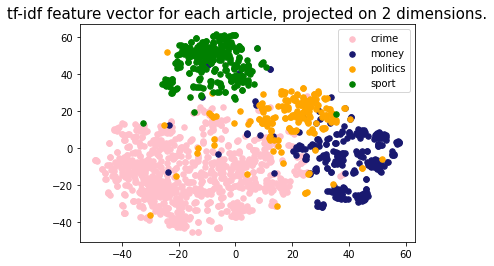

In [ ]:
import matplotlib.pyplot as plt

colors = ['pink', 'green', 'midnightblue', 'orange']

# Find points belonging to each category and plot them
for tag,tag_id in sorted(tag_to_id.items()):
    points = projected_features[(labels[indices] == tag_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[tag_id], label=tag)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

# Prepare Train & Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = tfidf.fit_transform(df['clean']) 
y = df['tag']

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=df['tag'])

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4569, 12617) (4569,)
(1143, 12617) (1143,)


In [ ]:
y_train.value_counts()/y.value_counts()

crime       0.799800
money       0.799800
sport       0.799599
politics    0.800836
Name: tag, dtype: float64

In [ ]:
N = len(id_to_tag)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=400, max_depth=100, random_state=101)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=400, random_state=101)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
pd.crosstab(y_test, y_pred)

col_0,crime,money,politics,sport
tag,,,,
crime,597,0,3,0
money,2,194,2,2
politics,21,5,115,2
sport,2,0,0,198


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Accuracy:\t %.3f" %accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:	 0.966
              precision    recall  f1-score   support

       crime       0.96      0.99      0.98       600
       money       0.97      0.97      0.97       200
    politics       0.96      0.80      0.87       143
       sport       0.98      0.99      0.99       200

    accuracy                           0.97      1143
   macro avg       0.97      0.94      0.95      1143
weighted avg       0.97      0.97      0.96      1143



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,100)}

rfc = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rfc, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5,
                                 random_state=101)

In [ ]:
# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f196adb9130>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1921e9c2e0>},
                   random_state=101)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 82, 'n_estimators': 376}


In [ ]:
# Generate predictions with the best model
y_pred_rand = best_rf.predict(X_test)

In [ ]:
pd.crosstab(y_test, y_pred_rand)

col_0,crime,money,politics,sport
tag,,,,
crime,597,0,3,0
money,2,194,2,2
politics,22,4,115,2
sport,4,0,0,196


In [ ]:
print("Accuracy:\t %.3f" %accuracy_score(y_test, y_pred_rand))
print(classification_report(y_test, y_pred_rand))

Accuracy:	 0.964
              precision    recall  f1-score   support

       crime       0.96      0.99      0.97       600
       money       0.98      0.97      0.97       200
    politics       0.96      0.80      0.87       143
       sport       0.98      0.98      0.98       200

    accuracy                           0.96      1143
   macro avg       0.97      0.94      0.95      1143
weighted avg       0.96      0.96      0.96      1143



In [ ]:
import joblib
joblib.dump(rf, "/content/drive/MyDrive/AI_Tagging/random_forest_thai.joblib")

['/content/drive/MyDrive/AI_Tagging/random_forest_thai.joblib']